In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
###### Day 2 Activity 5

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
###### Day 2 Activity 5
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
###### Day 2 Activity 5
measurement=Base.classes.measurement
station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
###### Day 2 Activity 5
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
###### Day 3 Activity 2 (there are other ways, but this example is very specific)
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

2016-08-22


<Figure size 720x720 with 0 Axes>

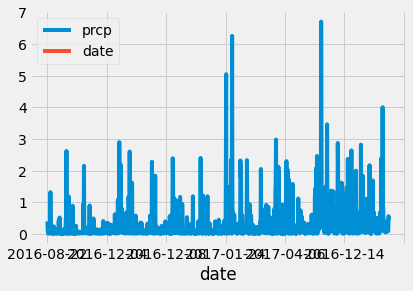

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
###### you can just look at the data to get this point OR use python to find it

# Calculate the date one year from the last date in data set.
###### This is also found in the data lecture #Day 3 Activity 2
###### Look for the code using timedelta
from turtle import width


last_year_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print(last_year_date)

# Perform a query to retrieve the data and precipitation scores
###### you can do this with session.query and .filter or with execute(SQL)
last_year_date_prcp_values=session.query(measurement.date, measurement.prcp, measurement.station).\
    filter(measurement.date >= last_year_date).\
    filter(measurement.prcp).all()
#print(last_year_date_prcp_values)

# Save the query results as a Pandas DataFrame and set the index to the date column
###### you can use pd.read_sql.  If you choose to use .filter you will need to pd.DataFrame()
last_year_date_prcp_values_df=pd.DataFrame(last_year_date_prcp_values)
last_year_date_prcp_values_df=last_year_date_prcp_values_df.set_index('date')
last_year_date_prcp_values_df

# Sort the dataframe by date
###### this is found throughout, but Day 3 Activity 3 has a specific example
last_year_date_prcp_values_df.sort_values(by=["date"])

# Use Pandas Plotting with Matplotlib to plot the data
# ######Day 3 Activity 3 has a specific example

last_year_date_prcp_values_df = pd.DataFrame(last_year_date_prcp_values_df, columns=['prcp', 'date'])
plt.figure(figsize=(10,10))
last_year_date_prcp_values_df.plot()
# plt.bar(last_year_date_prcp_values_df['date'], last_year_date_prcp_values_df['prcp'], align="center")
#plt.tight_layout()
plt.show()


In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
###### Pandas Day 1 Activity 4

last_year_date_prcp_values_df.describe()


,prcp,date
count,1152.000000,0.0
mean,0.315573,NaN
std,0.579451,NaN
min,0.010000,NaN
25%,0.030000,NaN
50%,0.110000,NaN
75%,0.320000,NaN
max,6.700000,NaN


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
#####  You can use session.query() or just plain SQL for this.
station_list_number=session.query(station.station).count()
station_list_number

9

In [33]:
station_list_number=session.query(station.station).all()
station_list_number

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#####  You can use session.query() or just plain SQL for this.
#what if I count each station individually???

# for record in station_list_active:
#     print(record)

station_activity1=session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity1


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#####  You can use session.query() or just plain SQL for this.

station_activity1_temps=session.query(func.avg(measurement.tobs), func.min(measurement.tobs), func.max(measurement.tobs)).\
    filter(measurement.station == "USC00519281")
station_activity1_temps.all()

[(71.66378066378067, 54.0, 85.0)]

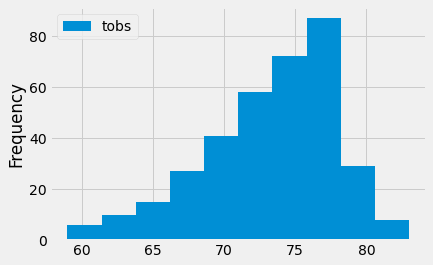

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#####  You can use session.query() or just plain SQL for this.
#####  The plot is similar to the one above

last_year_date_temp_values=session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    filter(measurement.date >= last_year_date).\
    filter(measurement.tobs).all()
# last_year_date_temp_values=session.query()
last_year_date_temp_values_df = pd.DataFrame(last_year_date_temp_values, columns=['date', 'tobs'])
last_year_date_temp_values_df.plot.hist()
plt.show()


# Close session

In [ ]:
# Close Session
session.close()